<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/ML01_TD5%20-%20Perceptron%20%26%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD5 - Premiers classifieurs discriminatifs linéaires

Réalisé par Cyprien Gilet et Khaled Belahcene

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats

from IPython.display import Image


# 1. Classifieur Perceptron

- Pour chaque observation $i \in \{1,\dots,n\}$, $Y_i$ caractérisera la variable aléatoire décrivant la classe de l'observation $i$.
- Pour chaque observation $i \in \{1,\dots,n\}$, $X_i = [X_{i1},\dots,X_{id}]$ caractérisera le vecteur aléatoire décrivant le profile de l'observation $i$, composés de $d$ variables descriptives.

Le Perceptron est un classifieur discriminatif binaire ($K=2$ classes : $Y_i\in\{-1,+1\}$). Il a été inventé par Frank Rosenblatt en 1957.
La règle de décision du classifieur Perceptron peut se définir comme :

\begin{equation}
\hat{Y}_i = \mathrm{Sign}\left(w_0 + \sum_{j=1}^d w_j X_{ij}\right),
\end{equation}
 
- Où $W = [w_0,\dots,w_d]\in\mathbb{R}^{d+1}$ correspond à un vecteur de poids générateur de l'hyperplan séparant la classe $-1$ de la clase $1$
- Et où quelque soit $z\in\mathbb{R}, \;  \mathrm{Sign}(z) = \begin{cases}
+1 \text{ si } z \geq 0 \\
-1 \text{ si } z < 0 
\end{cases}$.

Comme illustré dans la figure ci-dessous, l'architecture du Perceptron peut se voir comme un réseau de 1 seul neurone avec comme couche de sortie la fonction $\mathrm{Sign}$.

![title](Schema_Perceptron.pdf)

**Question 1.1.** Implémenter une fonction *perceptron_predict(W,X)* permettant d'attribuer une classe $\hat{Y}_i$ à chaque observation $X_{i} = [X_{i1},\dots,X_{id}]$ à partir d'un vecteur de poids $W= [w_0,\dots,w_d]\in\mathbb{R}^{d+1}$ donné.

In [13]:
# RÉPONSE À LA QUESTION 1.1 :

def perceptron_predict(W,X):
    n = np.shape(X)[0]
    Yhat = np.zeros(n)
    # À compléter
    for i in range(n):
        Zi = np.concatenate([np.ones(1), X[i,:]])
        Yhat[i] = np.sign(np.dot(W,Zi))
    return Yhat

### 1.1.  Apprentissage et algorithme du classifieur Perceptron.

Calibrer le classifieur Perceptron à partir d'une base d'apprentissage revient à calculer les poids $W= [w_0,\dots,w_d]\in\mathbb{R}^{d+1}$ permettant de séparer linéarement au mieux les observations de classe $1$ de celles de la classe $-1$. Pour ce faire, nous pouvons considérer l'algorithme du perceptron proposé par Rosenblatt :

- **Input:** Base d'apprentissage $\mathcal{S} = \{(Y_i,X_i), i=1\dots,n\}$
- Initialiser $W$
- Tant qu'il y a des erreurs de prediction
    - for $i=1,\dots,n$
        -  
  $\hat{Y}_i = \mathrm{Sign}\left(w_0 + \sum_{j=1}^d w_j X_{ij}\right)$
        - if $\hat{Y}_i * Y_i < 0$ :
            - $W \leftarrow W + Y_i \times [1, X_{i1}, \dots, X_{id}]$
            
- **Return:** $W$    

### 1.2.  Exemple avec 2 variables descriptives et 3 observations.

On se place dans un contexte simple où $d=2$ variables descriptives et $n=3$ observations, tel que :

- $X_1 =[1,3]$ et $Y_1 = -1$
- $X_2 =[2,2]$ et $Y_1 = -1$
- $X_3 =[1,1]$ et $Y_1 = +1$

Dans le contexte où l'on a $d=2$ variables descriptives, la frontière de décision sera une droite d'équation
\begin{equation}
\mathcal{D} = \left\{(x_1,x_2) : w_0 + w_1 x_1 + w_2 x_2 = 0\right\}.
\end{equation}

**Question 1.2.1.** Représenter les trois points $X_1,X_2,X_3$ sur une feuille de sorte que l'on visualise leur appartenance à chaque classe.

**Question 1.2.2.** Supposons que l'on ait initialisé $W = [0.5,2,-1]$, tracer la frontière de décision $\mathcal{D}$ sur cette même figure.

**Question 1.2.3.** Appliquer l'algorithme ci-dessus permettant d'ajuster la frontière de décision et mettre à jour la figure à chaque itération.

# 2.  Classifieur maximisant la marge

Lorsque les données sont *linéairement séparables*, on peut chercher, parmi toutes les règles de décisions linéaires qui séparent les points de l'ensemble d'apprentissage, celle qui produit la frontière de décision -- l'*hyperplan séparateur*-- le plus éloigné des points d'apprentissage.
- **Cas de deux points :** quel est l'hyperplan séparateur de marge maximale permettant de séparer $X^+$ et $X^-$ ? Application au cas précédent avec $d=2$ $X^+=\{(1,1)\}$ et $X^-_1=\{(2,4)\}$ : déterminer à la main la règle de décision de marge maximale, et visualiser la frontière de décision correspondante.
- **Cas avec trois points :**
    * Avec $X^-_2=\{(2,4), (1,5)\}$, montrer que la règle de décision déterminée précédemment reste inchangée. La frontière est uniquement déterminée par les points (1,1) et (2,4), pour lesquels on dit que *la contrainte de marge est saturée*, et on parle de *vecteurs de support*.
    * Montrer qu'il n'en est pas de même avec $X^-_3=\{(2,4), (1,5), (0,4)\}$. Quels sont les vecteurs de support ?
- **En général :** On peut trouver le séparateur de plus grande marge en résolvant le problème d'optimisation vu en cours, ou une formulation équivalente alternative (il en existe de nombreuses, avec leurs qualités et leurs défauts). Nous verrons par la suite un algorithme de *descente de gradient* permettant de le déterminer. On peut aussi utiliser l'une des implémentations proposée par scikit-learn (avec `svm.SVC(kernel='linear')` ).




### Correction


- Dans le cas de deux points, l'hyperplan séparateur de marge maximale est l'hyperplan médiateur (preuve inutile ici : on peut montrer que la somme des marges relatives à chaque point est inférieure à la distance entre les points en considérant les deux boules centrées sur les points, de rayon la marge correspondante, qui sont tangents à l'hyperplan séparateur, ce qui n'est possible que si ces boules sont disjointes ou tangentes). 
    Pour les points donnés, la médiatrice $\Delta$ est normale au vecteur $\arrow(X_2,X_1) = [1 ; 3 ]$ et passe par le milieu $M$ de $[X_1,X_2] = [1.5 , 2.5]$. Elle a pour équation cartésienne $x+3y + 9= 0$. Le cours préconise d'utiliser la règle de décision 
    $$
    f_\Delta((x,y)) = \frac{-1}{\sqrt{10}} x - \frac{3}{\sqrt{10}} y + \frac{9}{\sqrt{10}},
    $$
    dont :
    * le signe correspond à celui des classes,
    * la valeur absolue correspond à la marge (la distance entre la frontière de décision et le plus proche des points de l'ensemble d'apprentissage).
    Géométriquement, la marge est  $\|X_1,M\|_2= \frac{1}{2} \|X_1,X_2\|=\frac{\sqrt{10}}{2}$. On vérifie que $f((1,1))=\frac{5}{\sqrt{10}}=\frac{\sqrt{10}}{2}$ et $f((2,4))=\frac{-5}{\sqrt{10}}$.

- Le problème $max\_margin(X^+,X^-_2)$ est plus contraint que $max\_margin(X^+,X^-_1)$, donc la valeur de sa solution est inférieure ou égale - autrement dit, on ne peut pas espérer améliorer la performance de $\Delta$. Par ailleurs, on va voir que $\Delta$ reste un classifieur valide de marge $\frac{5}{\sqrt{10}}$ :
  $f_\Delta((1,5)) = -7/\sqrt{10}$ donc le point $(1,5)$ est situé du bon côté de $\Delta$ (côté négatif) et à une distance $7/\sqrt{10}$ supérieure à $5/\sqrt{10}$, donc la marge de $\Delta$ reste inchangée.
  Finalement, $f_\Delta$ reste un classifieur optimal pour $X^+, X^-_2$.

$f_\Delta((0,4)) = -3/\sqrt{10}$ : le point $(1,1)$ est correctement classé par $f_\Delta$, mais dégrade la marge. On peut trouver un meilleur classifieur dont le support est $(1,1):+, (2,4):-, (0,4):-$. Les deux points de la classe $-$ sont sur une ligne de niveau de $f$ donc $f$ est une droite parallèle à $(2,4), (0,4)$ (horizontale donc), et à mi distance entre ces deux points et $(1,1)$, c'est donc $f_{\Delta'} = -y+2.5$ et on vérifie :
  $f_{\Delta'}((1,1)) = 1.5, f_{\Delta'}((2,4)) = -1.5, f_{\Delta'}((0,5)) = -2.5, f_{\Delta'}((0,4)) = -1.5$ 

# 3.  Comparaison Classifieurs Perceptron et SVM :

On se place dans un contexte simple où $d=2$ variables descriptives tel que :

- $n=100$ observations telles que $n_1 = 50$ observations appartiendront à la classe $1$ et $n_2 = 50$ observations à la classe $-1$.
- Pour chaque observation $i \in \{1,\dots,n\}$, $Y_i$ caractérisera la variable aléatoire décrivant la classe de l'observation $i$.
- Pour chaque observation $i \in \{1,\dots,n\}$, $X_i = [X_{i1},X_{i2}]$ sera généré de la façon suivante

    \begin{equation}
    X_i \sim \mathcal{N}\left(\mu_1, \Sigma_1 \right) \; \text{si} \; Y_i = -1 \quad\quad \text{et} \quad\quad  X_i \sim \mathcal{N}\left(\mu_2, \Sigma_2 \right) \; \text{si} \; Y_i = 1.
    \end{equation}
    où
    \begin{equation}
        \mu_1 = [0, 0], \quad \mu_2 = [6, 7], \quad 
        \Sigma_1 = \begin{bmatrix}
                 2 & 1 \\ 
                 1 & 3
                \end{bmatrix}, \quad 
        \Sigma_2 = \begin{bmatrix}
                 6 & -3 \\ 
                 -3 & 3.5
                \end{bmatrix},  
    \end{equation}

**Question 3.1.** À l'aide du TD4, représenter le scatter plot de cette base de données.

**Question 3.2.** Implémenter une fonction *fit_perceptron(XTrain,YTrain,T)* permettant de calibrer le classifieur Perceptron sur une base d'apprentissage à partir de l'algorithme décrit dans la Section 1.1. On fera en sorte que pour chaque itération cet algorithme stock dans un tableau la proportion d'erreur de prédiction sur la base d'apprentissage de sorte à pouvoir analiser la convergence de l'algorithme.

**Question 3.3.** Calibrer le classifieur Perceptron sur cette base de données simulée et tracer la convergence du taux d'erreur en fonction des itérations.

**Question 3.4.** Calibrer le classifieur SVM sur cette base de données en utilisant la fonction Scikit-Learn  `svm.SVC(kernel='linear')`. Quel est le taux d'erreurs global sur cette base d'apprentissage ?

**Question 3.4.** Afficher sur le scatter plot les frontière de décisions obtenue par chaque classifieur en vous inspirant du TD4.



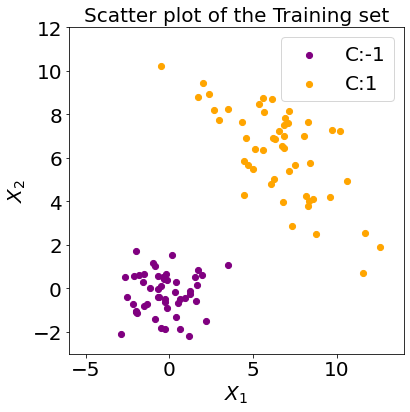

In [20]:
# RÉPONSE À LA QUESTION 3.1 :
np.random.seed(407)

d = 2
n1 = 50 
n2 = 50
n = n1+n2
mu1 = [0, 0]
mu2 = [6, 7]
Cov1 = np.array([[4, 0], [0, 1]])
Cov2 = np.array([[6, -3], [-3, 3.5]])
rng = np.random.default_rng(10)
XTrain = np.r_[rng.multivariate_normal(mu1, Cov1, size=n1), rng.multivariate_normal(mu2, Cov2, size=n2)]
YTrain = np.r_[-np.ones((n1,1)), np.ones((n2,1))].ravel()

figScatter = plt.figure(figsize=(6,6))
ax1 = figScatter.add_subplot(1,1,1)
ax1.scatter(XTrain[np.where(YTrain==-1),0], XTrain[np.where(YTrain==-1),1], color='purple', marker='.', label='C:-1',s=150)
ax1.scatter(XTrain[np.where(YTrain==1),0], XTrain[np.where(YTrain==1),1], color='orange', marker='.', label='C:1',s=150)
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_xlim([-6,14])
ax1.set_ylim([-3,12])
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)



In [5]:
# RÉPONSE À LA QUESTION 3.2 :

def fit_perceptron(XTrain,YTrain,T):
    n = np.shape(XTrain)[0]
    d = np.shape(XTrain)[1]
    W = np.zeros(d+1)

    stock_err = np.zeros(T*n)
    iteration = 0

    for t in range(T):

        for i in range(n):
            
            yhat = perceptron_predict(W,XTrain)
            stock_err[iteration] = np.mean(yhat!=YTrain)
            
            Ai = np.concatenate([np.ones(1), XTrain[i,:]])
            if YTrain[i]*yhat[i] <=0 :
                W = W + YTrain[i] * Ai
                
            iteration = iteration + 1      
    
    return W, stock_err

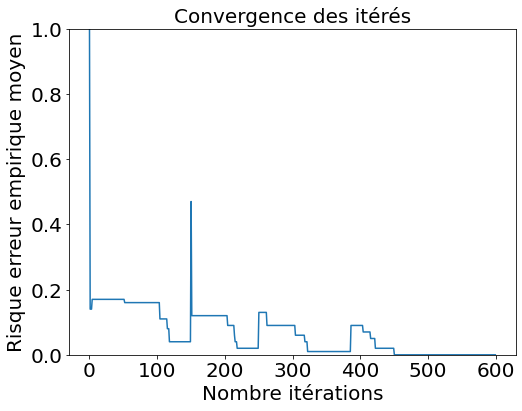

In [14]:
# RÉPONSE À LA QUESTION 3.3 :
W, stock_err = fit_perceptron(XTrain,YTrain,6)
figConv = plt.figure(figsize=(8,6))
ax1 = figConv.add_subplot(1,1,1)
ax1.plot(stock_err)
ax1.set_ylim([0,1])
ax1.set_xlabel("Nombre itérations",fontsize=20)
ax1.set_ylabel("Risque erreur empirique moyen",fontsize=20)
ax1.set_title('Convergence des itérés', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


In [15]:
# RÉPONSE À LA QUESTION 3.4 :
from sklearn import svm
SVMclf = svm.SVC(kernel='linear')
SVMclf.fit(XTrain, YTrain)
YhatSVM = SVMclf.predict(XTrain)
err_SVM = np.sum(YhatSVM!=YTrain)/n
print('Taux erreur SVM =', err_SVM)

Taux erreur SVM = 0.0


# 4.  Lorsque les classes ne sont pas parfaitement séparables ?

On considère maintenant que chaque observation $i \in \{1,\dots,n\}$, $X_i = [X_{i1},X_{i2}]$ sera générée de la façon suivante

\begin{equation}
X_i \sim \mathcal{N}\left(\mu_1, \Sigma_1 \right) \; \text{si} \; Y_i = -1 \quad\quad \text{et} \quad\quad  X_i \sim \mathcal{N}\left(\mu_2, \Sigma_2 \right) \; \text{si} \; Y_i = 1.
\end{equation}
où
\begin{equation}
    \mu_1 = [0, 0], \quad \mu_2 = [0, 4], \quad 
    \Sigma_1 = \begin{bmatrix}
             2 & 1 \\ 
             1 & 3
            \end{bmatrix}, \quad 
    \Sigma_2 = \begin{bmatrix}
             6 & -3 \\ 
             -3 & 3.5
            \end{bmatrix},  
\end{equation}

**Question 4.1.** À l'aide du TD4, représenter le scatter plot de cette base de données.

**Question 4.2.** Calibrer le classifieur Perceptron sur cette base de données simulée et tracer la convergence du taux d'erreur en fonction des itérations. Que pouvons nous observer ?

**Question 4.3.** Calibrer le classifieur SVM sur cette base de données simulée et calculer le taux d'erreur global.

**Question 4.3.** Afficher sur le scatter plot les frontières de décision obtenues par ces deux classifieurs.




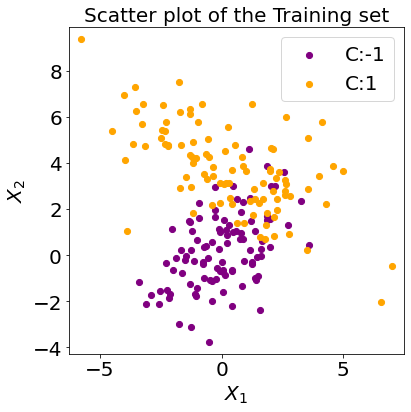

In [21]:
# RÉPONSE À LA QUESTION 4.1 :
np.random.seed(407)

n1 = 100 
n2 = 100
n = n1+n2
mu1 = [0, 0]
mu2 = [0, 4]
Cov1 = np.array([[2, 1], [1, 3]])
Cov2 = np.array([[6, -3], [-3, 3.5]])
rng = np.random.default_rng(0)
XTrain_new = np.r_[rng.multivariate_normal(mu1, Cov1, size=n1), rng.multivariate_normal(mu2, Cov2, size=n2)]
YTrain_new = np.r_[-np.ones((n1,1)), np.ones((n2,1))].ravel()

X1_min, X1_max = XTrain_new[:, 0].min() - 0.5, XTrain_new[:, 0].max() + 0.5
X2_min, X2_max = XTrain_new[:, 1].min() - 0.5, XTrain_new[:, 1].max() + 0.5

figScatter = plt.figure(figsize=(6,6))
ax1 = figScatter.add_subplot(1,1,1)
ax1.scatter(XTrain_new[np.where(YTrain_new==-1),0], XTrain_new[np.where(YTrain_new==-1),1], color='purple', marker='.', label='C:-1',s=150)
ax1.scatter(XTrain_new[np.where(YTrain_new==1),0], XTrain_new[np.where(YTrain_new==1),1], color='orange', marker='.', label='C:1',s=150)
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.set_xlim([X1_min,X1_max])
ax1.set_ylim([X2_min,X2_max])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

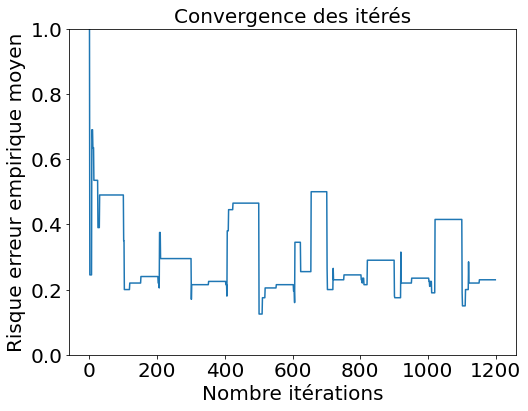

In [17]:
# RÉPONSE À LA QUESTION 4.2 :
W_new, stock_err = fit_perceptron(XTrain_new,YTrain_new,6)
figConv = plt.figure(figsize=(8,6))
ax1 = figConv.add_subplot(1,1,1)
ax1.plot(stock_err)
ax1.set_ylim([0,1])
ax1.set_xlabel("Nombre itérations",fontsize=20)
ax1.set_ylabel("Risque erreur empirique moyen",fontsize=20)
ax1.set_title('Convergence des itérés', fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)


In [18]:
# RÉPONSE À LA QUESTION 4.3 :

SVMclf = svm.SVC(kernel='linear')
SVMclf.fit(XTrain_new, YTrain_new)
YhatSVM = SVMclf.predict(XTrain_new)
err_SVM = np.sum(YhatSVM!=YTrain_new)/n
print('Taux erreur SVM =', err_SVM)

Taux erreur SVM = 0.135


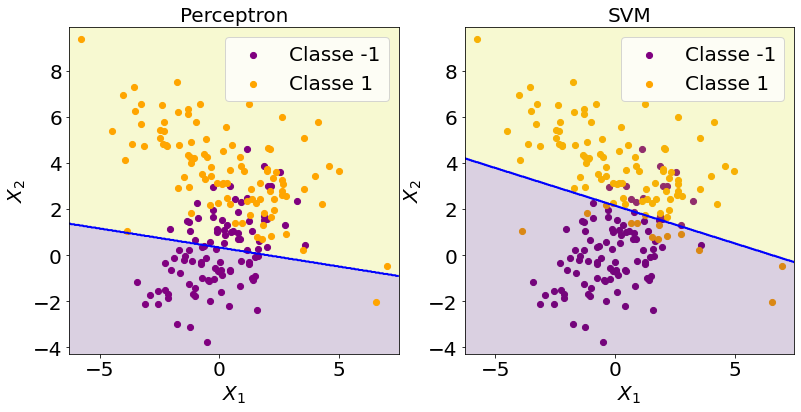

In [19]:
# RÉPONSE À LA QUESTION 4.4 :

nn = 500
X1_min, X1_max = XTrain_new[:, 0].min() - 0.5, XTrain_new[:, 0].max() + 0.5
X2_min, X2_max = XTrain_new[:, 1].min() - 0.5, XTrain_new[:, 1].max() + 0.5
XX1_new, XX2_new = np.meshgrid(np.linspace(X1_min, X1_max, nn), np.linspace(X2_min, X2_max, nn))
Z_spct = perceptron_predict(W_new,np.c_[XX1_new.ravel(), XX2_new.ravel()])
Z_spct = Z_spct.reshape(XX1_new.shape)

figScatter_new = plt.figure(figsize=(13,6))
ax1_new = figScatter_new.add_subplot(1,2,1)
out = ax1_new.contourf(XX1_new, XX2_new, Z_spct, alpha=0.2)
bound = ax1_new.contour(XX1_new, XX2_new, Z_spct, [0.5], linewidths=2.0, colors="blue")
ax1_new.scatter(XTrain_new[np.where(YTrain_new==-1),0], XTrain_new[np.where(YTrain_new==-1),1], color='purple', marker='.', label='Classe -1',s=150)
ax1_new.scatter(XTrain_new[np.where(YTrain_new==1),0], XTrain_new[np.where(YTrain_new==1),1], color='orange', marker='.', label='Classe 1',s=150)
ax1_new.legend(fontsize=20, loc='upper right')
ax1_new.set_xlabel("$X_1$",fontsize=20)
ax1_new.set_ylabel("$X_2$",fontsize=20)
ax1_new.set_title("Perceptron",fontsize=20)
ax1_new.set_xlim([X1_min,X1_max])
ax1_new.set_ylim([X2_min,X2_max])
ax1_new.tick_params(axis='x', labelsize=20)
ax1_new.tick_params(axis='y', labelsize=20)

ax2_new = figScatter_new.add_subplot(1,2,2)
ax2_new.scatter(XTrain_new[np.where(YTrain_new==-1),0], XTrain_new[np.where(YTrain_new==-1),1], color='purple', marker='.', label='Classe -1',s=150)
ax2_new.scatter(XTrain_new[np.where(YTrain_new==1),0], XTrain_new[np.where(YTrain_new==1),1], color='orange', marker='.', label='Classe 1',s=150)
Z_SVM = SVMclf.predict(np.c_[XX1_new.ravel(), XX2_new.ravel()])
Z_SVM = Z_SVM.reshape(XX1_new.shape)
out = ax2_new.contourf(XX1_new, XX2_new, Z_SVM, alpha=0.2)
bound = ax2_new.contour(XX1_new, XX2_new, Z_SVM, [0.5], linewidths=2.0, colors="blue")
ax2_new.legend(fontsize=20, loc='upper right')
ax2_new.set_xlabel("$X_1$",fontsize=20)
ax2_new.set_ylabel("$X_2$",fontsize=20)
ax2_new.set_title("SVM",fontsize=20)
ax2_new.tick_params(axis='x', labelsize=20)
ax2_new.tick_params(axis='y', labelsize=20)


